In [22]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
#import squarify
#import plotly.offline as py
#import plotly_express as px

#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, add_changepoints_to_plot

from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv("/Users/vibuitruong/Documents/VEF Academy/final_project/Vietnam.csv", parse_dates=['date'], index_col='date')

In [7]:
df = df[['new_cases']]

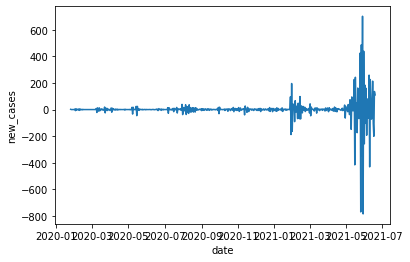

In [10]:
df_diff = df.diff().diff()
df_diff.dropna(inplace=True)
sns.lineplot(data=df_diff, x=df_diff.index, y="new_cases")

In [11]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff['new_cases'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.769165e+00
p-value                        2.669058e-09
#Lags Used                     1.900000e+01
Number of Observations Used    4.920000e+02
Critical Value (1%)           -3.443711e+00
Critical Value (5%)           -2.867432e+00
Critical Value (10%)          -2.569908e+00
dtype: float64


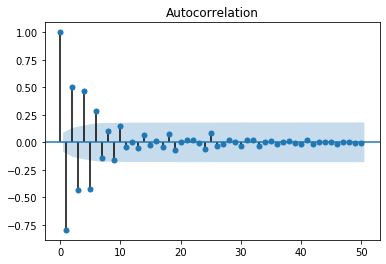

In [12]:
plt = plot_acf(df_diff, lags=50)
plt.show()

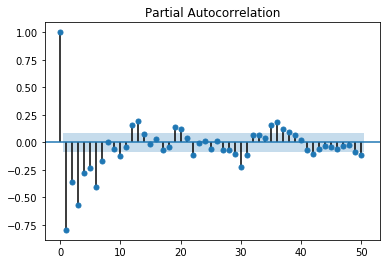

In [13]:
plt = plot_pacf(df_diff, lags=50)
plt.show()

In [15]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df['new_cases'], ## Original Time Series
                      d=2, ## number of normal (non-seasonal) differencing
                      D=2, ## number of seasonal differencing
                      seasonal=True, 
                      m=1, ## Monthly data, so m = 12
                      trend='c',
                      start_p=0, 
                      start_q=0, 
                      test='adf', ## Augmented Dickey-Fuller test
                      stepwise=True, ## Method of search for the best model parameters
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6000.027, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5486.882, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=5408.008, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=5183.887, Time=0.14 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5137.190, Time=0.15 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=5109.119, Time=0.18 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=4940.364, Time=0.58 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=4936.317, Time=0.56 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=4951.960, Time=0.57 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=4943.844, Time=0.63 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=4936.317, Time=0.56 sec

Best model:  ARIMA(5,2,2)(0,0,0)[0]          
T

In [16]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  514
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -2459.158
Date:                Tue, 22 Jun 2021   AIC                           4936.317
Time:                        16:10:49   BIC                           4974.462
Sample:                             0   HQIC                          4951.269
                                - 514                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0443      0.065      0.677      0.499      -0.084       0.173
ar.L1         -0.6004      0.107     -5.615      0.000      -0.810      -0.391
ar.L2         -0.3881      0.113     -3.439      0.0

In [26]:
model = ARIMA(df, order=(5, 2, 2))
model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.new_cases   No. Observations:                  512
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -2459.162
Method:                       css-mle   S.D. of innovations             29.293
Date:                Tue, 22 Jun 2021   AIC                           4936.324
Time:                        16:20:40   BIC                           4974.469
Sample:                    01-25-2020   HQIC                          4951.277
                         - 06-19-2021                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0173      0.013      1.295      0.195      -0.009       0.044
ar.L1.D2.new_cases    -0.6007      0.160     -3.765      0.000      -0.913      -0.288
ar.L2.D2.new_cases  

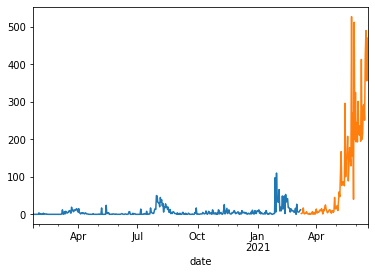

In [17]:
# Divide into train and validation set
divide = int(0.80*(len(df)))
train = df[:divide]
test = df[divide:]

# Plotting the data
train['new_cases'].plot()
test['new_cases'].plot()

In [19]:
# Fitting model 

model = SARIMAX(train['new_cases'], 
                order=(5,2,2),
                )

fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_cases   No. Observations:                  411
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -1473.056
Date:                Tue, 22 Jun 2021   AIC                           2962.113
Time:                        16:12:47   BIC                           2994.222
Sample:                    01-23-2020   HQIC                          2974.817
                         - 03-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0622      0.062     -1.000      0.317      -0.184       0.060
ar.L2          0.3390      0.050      6.785      0.000       0.241       0.437
ar.L3          0.1568      0.042      3.714      0.000       0.074       0.239
ar.L4         -0.0957      0.022     -4.280      0.000      -0.140      -0.052
ar.L5         -0.1469      0.032     -4.631      0.000      -0.209      -0.085
ma.L1         -1.7646      0.063    -28.006      0.000      -1.888      -1.641
ma.L2          0.7664      0.064     11.890      0.000       0.640       0.893
sigma2        76.7439      1.244     61.709      0.000      74.306      79.181
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             27834.83
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              11.75   Skew:                             4.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# Forecasting

forecast_object = fitted_model.get_forecast(steps=len(test))

mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

dates = mean.index

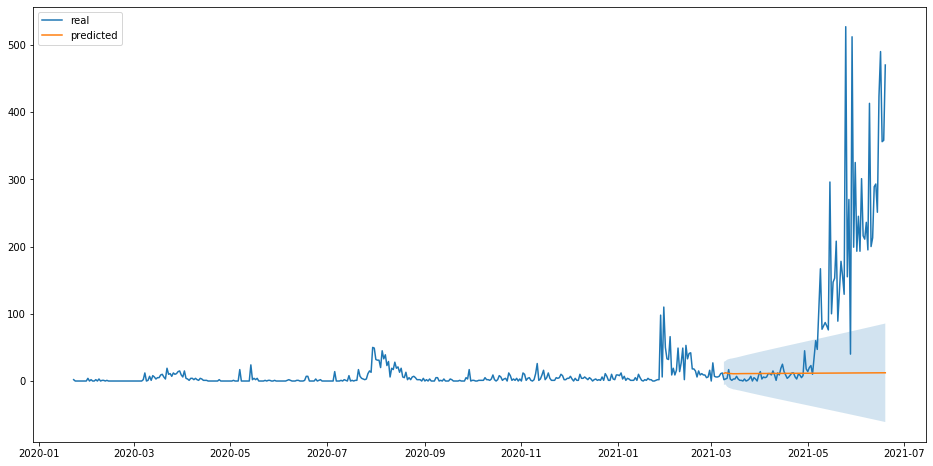

In [23]:
plt.figure(figsize=(16,8))

# Plot actual values
plt.plot(df.index, df, label='real')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [24]:
fitted_model.plot_predict(start=3, end=len(df))
plt.show()

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

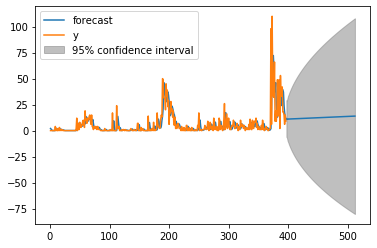

In [129]:
model_fit.plot_predict(start=1, end=len(df)+15)
plt.rcParams['figure.figsize'] = [14, 14]
plt.show()

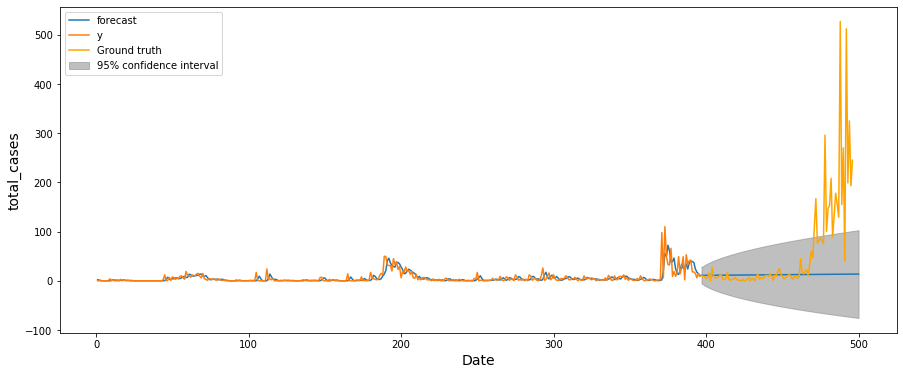

In [130]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)
model_fit = model.fit(disp=0)
model_fit.plot_predict(1, 500, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

#ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='total_cases', fontsize=14)

ax.set_ylim()
plt.show()

In [68]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=7,              # frequency of series
                      #d=2,           # let model determine 'd'
                      seasonal=False,  
                      # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2902.195, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3193.351, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3021.242, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3114.833, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2869.511, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2881.295, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2868.323, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2866.506, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2868.195, Time=0.04 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2870.066, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2862.776, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2874.993, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2864.085, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2864.424, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept

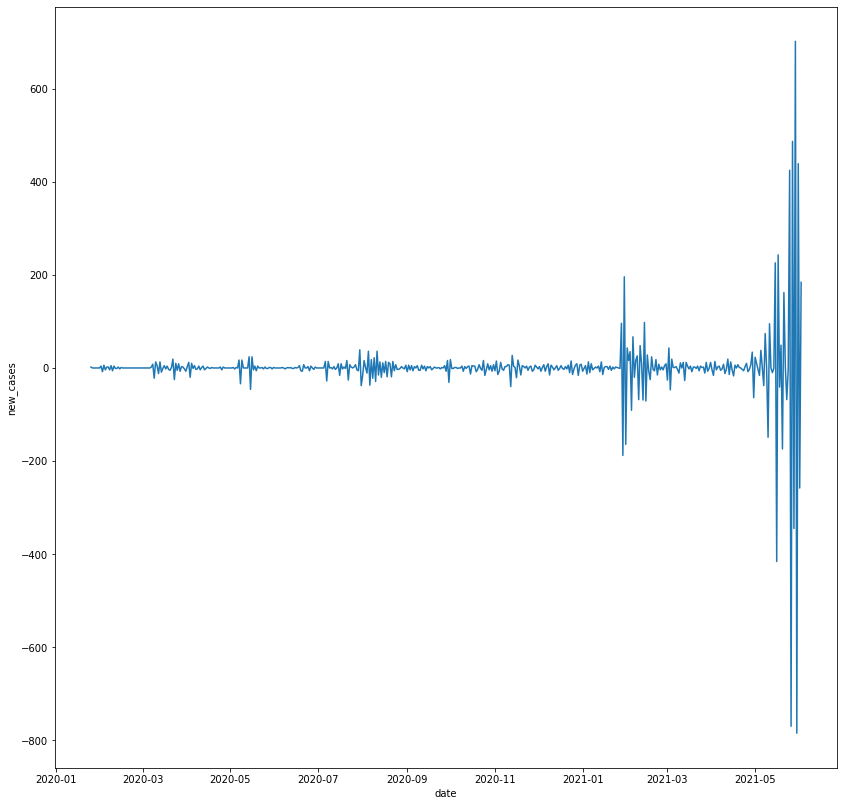

In [140]:
df_diff = dg.diff().diff()#.diff()

sns.lineplot(data=df_diff, x=df_diff.index, y="new_cases")

In [141]:
df_diff.dropna(inplace=True)

In [142]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff['new_cases'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.266021e+01
p-value                        1.309959e-23
#Lags Used                     1.500000e+01
Number of Observations Used    4.790000e+02
Critical Value (1%)           -3.444076e+00
Critical Value (5%)           -2.867593e+00
Critical Value (10%)          -2.569994e+00
dtype: float64


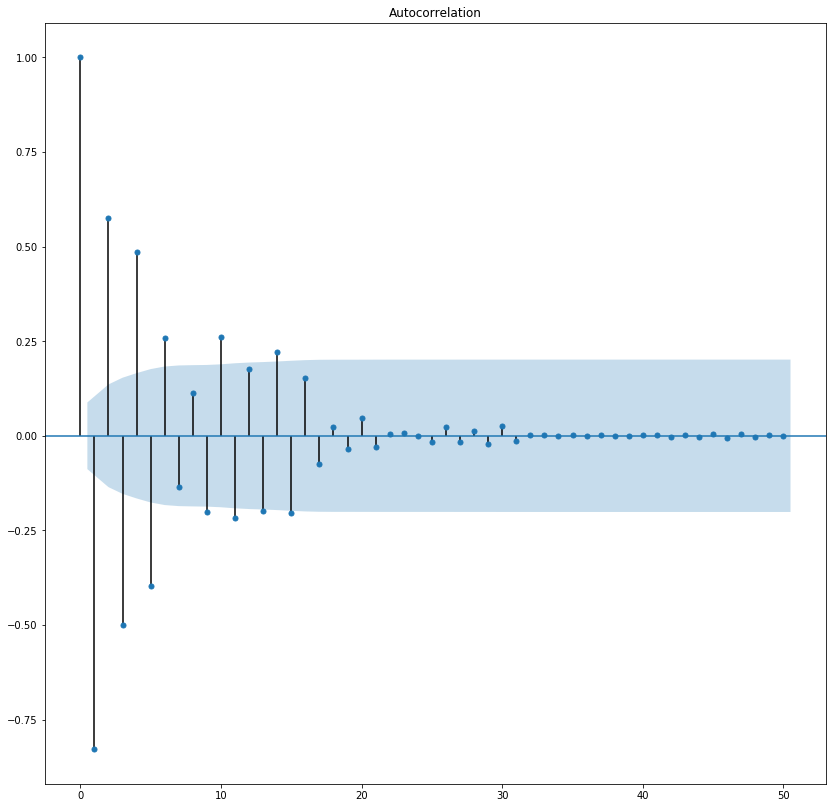

In [143]:
plt = plot_acf(df_diff, lags=50)
plt.show()

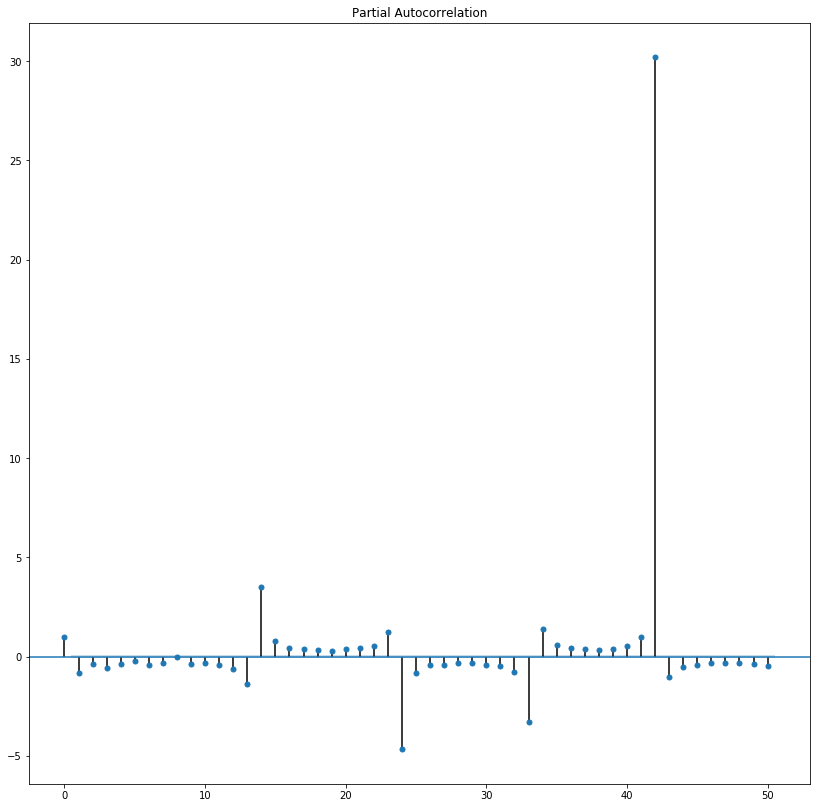

In [144]:
plt = plot_pacf(df_diff, lags=50)
plt.show()

In [58]:
model = pm.auto_arima(df_diff['new_cases'], ## Original Time Series
                      d=1, ## number of normal (non-seasonal) differencing
                      D=1, ## number of seasonal differencing
                      seasonal=True, 
                      m=1, ## Monthly data, so m = 12
                      trend='c',
                      start_p=0, 
                      start_q=0, 
                      test='adf', ## Augmented Dickey-Fuller test
                      stepwise=True, ## Method of search for the best model parameters
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5927.567, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5088.005, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5927.567, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5074.798, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5074.798, Time=0.07 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.400 seconds


In [59]:
df=df_diff

In [63]:
df_diff

,new_cases
date,
2020-01-31,2.0
2020-02-01,4.0
2020-02-02,-4.0
2020-02-03,2.0
2020-02-04,-2.0
...,...
2021-05-29,426.0
2021-05-30,-291.0
2021-05-31,153.0
